In [2]:
import numpy as np
import functions as func
import matplotlib.pyplot as plt
import pdb, glob, mpld3, time
import mirpyidl as idl
from tqdm import tqdm
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from mpld3 import plugins

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
mpld3.enable_notebook()

## From actual idl

In [55]:
corr_flux_hd = ascii.read('../hd_ch1_cFlux.csv')
hd_data = ascii.read('hd_ch1_data.csv')
hd_data['Refined_Flux'] = np.array(corr_flux_hd).astype('Float64')
hd_data

File#,ACenX,ACenY,FCenX,FCenY,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux,Refined_Flux
str13,float64,float64,float64,float64,float64,float64,float64,float64,float64
11638016_0000,130.204115142,126.80802829,130.205385657,126.525119496,53204.9589689,17280.79676,217.582731405,17063.2140286,17350.71
11638016_0001,467.738847917,118.198197201,130.205385657,126.525119496,53204.9592097,17280.79676,217.582731405,17063.2140286,17350.71
11638016_0002,67.7769860643,190.064908182,68.0432073057,189.838214351,53204.9594597,17718.4987023,206.468540936,17512.0301614,17303.166
11638016_0003,401.592275999,182.442111262,68.0432073057,189.838214351,53204.9596819,17718.4987023,206.468540936,17512.0301614,17303.166
11638016_0004,193.189569783,189.613813838,193.13645238,189.134013889,53204.9598902,17704.1132683,257.384416515,17446.7288518,17253.849
11638016_0005,535.692164497,183.535475108,193.13645238,189.134013889,53204.9601125,17704.1132683,257.384416515,17446.7288518,17253.849
11638016_0006,192.87679071,63.5899235305,193.026840568,63.1090896377,53204.9603579,17862.8007192,301.4909772,17561.309742,17179.217
11638016_0007,536.361342463,53.2168954741,193.026840568,63.1090896377,53204.96058,17862.8007192,301.4909772,17561.309742,17179.217
11638016_0008,66.785199777,63.9439145388,67.0511936806,63.4841993491,53204.9608393,17696.8168828,297.255299381,17399.5615834,17439.253


In [56]:
ascii.write(hd_data, 'hd_ch1_refined_data.csv', overwrite = True)

In [57]:
corr_flux_bd = ascii.read('../bd_ch1_cFlux.csv')
bd_data = ascii.read('bd_ch1_data.csv')
bd_data['Refined_Flux'] = np.array(corr_flux_bd).astype('Float64')
bd_data

File#,ACenX,ACenY,FCenX,FCenY,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux,Refined_Flux
str13,float64,float64,float64,float64,float64,float64,float64,float64,float64
11641856_0000,130.127231671,126.954124127,130.204996285,126.743548224,53204.9626309,1069.06381008,20.382972703,1048.68083738,1057.2339
11641856_0000,130.126604411,126.95375743,130.210546687,126.739876313,53204.9626541,1036.52498967,-8.43654856798,1044.96153824,1054.1484
11641856_0001,467.821380679,118.70908066,130.210546687,126.739876313,53204.962992,1036.52498967,-8.43654856798,1044.96153824,1054.1484
11641856_0001,467.901623142,118.739903258,130.210546687,126.739876313,53204.9630152,1036.52498967,-8.43654856798,1044.96153824,1054.1484
11641856_0002,67.5821841821,189.584247263,67.8758878213,189.20563554,53204.9633578,1052.0485346,12.4035950505,1039.64493955,1040.2313
11641856_0002,67.400804988,189.587760384,67.7570365874,189.246752074,53204.9633809,1018.33387787,-11.511892358,1029.84577023,1040.6274
11641856_0003,401.494674015,182.168459511,67.7570365874,189.246752074,53204.9636957,1018.33387787,-11.511892358,1029.84577023,1040.6274
11641856_0003,401.611948954,182.128148143,67.7570365874,189.246752074,53204.9637188,1018.33387787,-11.511892358,1029.84577023,1040.6274
11641856_0004,193.294811182,189.4110393,193.206486787,189.196411537,53204.9640197,1075.75310644,12.7802537429,1062.9728527,1061.4516


In [58]:
ascii.write(bd_data, 'bd_ch1_refined_data.csv', overwrite = True)

## pyIDL version

In [3]:
data = ascii.read('bd_ch1_data.csv')
cenX = np.array(data['FCenX'])
cenY = np.array(data['FCenY'])
obsFlux = np.array(data['Raw_Flux'])

In [4]:
idl.setVariable('cenX', cenX)
idl.setVariable('cenY', cenY)
idl.setVariable('obsFlux', obsFlux)

In [17]:
idl.execute('a = IRAC_APHOT_CORR_CRYO(obsFlux, cenX, cenY, 1)')

In [15]:
idl.execute('a =IRAC_APHOT_CORR_CRYO(1069, 130, 63, 1)')

In [18]:
a = idl.getVariable('a')
a

array([ 1077.78316688,  1045.63769216,  1045.63769216, ...,  1046.29960609,
        1046.29960609,  1046.29960609])

In [13]:
obsFlux, cenX, cenY

(array([ 1069.06381008,  1036.52498967,  1036.52498967, ...,  1060.32153801,
         1060.32153801,  1060.32153801]),
 array([ 130.20499629,  130.21054669,  130.21054669, ...,   67.02169712,
          67.02169712,   67.02169712]),
 array([ 126.74354822,  126.73987631,  126.73987631, ...,   63.82652257,
          63.82652257,   63.82652257]))

In [8]:
idl.execute('a = 1+1')

## Systematics Corrections

In [ ]:
#Pixel phase correction
def ppcorr(channel, cenX, cenY):
    fname    = channel+'_ppcorr_cryo_final.fits'
    corrFile = fits.open('../photcorr/PixPhase/' + fname)
    corrImg  = corrFile[0].data
    corrFile.close()
    
    xp = cenX - np.round(cenX)
    yp = cenY - np.round(cenY)

## BD +60 1753

In [2]:
fnames = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r*/ch1/bcd/*_bcd.fits'))
len(fnames)

19742

In [4]:
# Test sample
hdu = fits.open(fnames[10])
hdr = hdu[0].header
img = hdu[0].data
hdu.close()

In [12]:
img = img/hdr['FLUXCONV']
img

array([[  0.18609861,  -4.93411875,  -3.44571829, ...,   2.97335386,
          4.56920385,  -6.37307978],
       [  1.74301767,  -8.11775303,   0.75837612, ...,  -1.64303577,
          2.63996506,   1.34835768],
       [-14.65817165,   0.09985261,   1.71258485, ...,  -3.99815726,
         -3.22871757,   6.85386276],
       ..., 
       [ -1.63621819,  -3.10558271, -15.38981819, ...,  -5.51500416,
         -7.37318277,   2.26798272],
       [ -8.61620617,   0.72513247,  -2.26471162, ...,   0.54368508,
         -4.91795015,  -2.01196003],
       [  0.22272244,  -1.40634763, -12.85727596, ...,  -3.72711015,
         -3.79712057,  -2.5234189 ]], dtype=float32)

In [3]:
sky = SkyCoord('17 24 52.2772360943 +60 25 50.780790994', unit=(u.hourangle, u.deg))

#Issues list
crd_conversion = []
centroiding    = []
bad_cen_guess  = []

data = Table(names = ('File#','ACenX', 'ACenY', 'FCenX', 'FCenY', 'Arr_Corr', 'Time[MJD]', 'Raw_Flux', 'Bkg_Flux', 'Res_Flux'), 
             dtype = ('S15', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8'))


for fn in tqdm(fnames):
    
    hdu    = fits.open(fn)
    header = hdu[0].header
    image  = hdu[0].data
#     image  = image/header['FLUXCONV'] #Converting to DN/sec
    hdu.close()

    arr_corr_hdu = fits.open('../photcorr/ch1_photcorr_rj.fits')
    arr_corr_img = arr_corr_hdu[0].data

    fnum = fn[62:75]
    Time = header['MJD_OBS']

    try:
        w = WCS(header)
        pix = sky.to_pixel(w)
    except:
        crd_conversion.append(fnum)
        continue

    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):

        try:
            cenX, cenY = func.gen_center_g2d(pix[0], pix[1], 7, 5, 4, 4, 0, image)
        except:
            centroiding.append(fnum)
            continue
        
        if (np.abs(cenX - pix[0]) <= 2) & (np.abs(cenY-pix[1]) <= 2):
            
            try:
                #Array loaction dependent correction factor
                arr_corr = arr_corr_img[cenX, cenY]

                # Extracting raw flux
                raw_flux, src_ap = func.photometry(image, [cenX], [cenY], rad = 10)
                raw_flux = raw_flux*arr_corr      #Array loaction dependent correction

                # Extrating a mean background flux
                bkg, bkg_ap = func.photometry(image, [cenX], [cenY], shape = 'CircAnn', r_in = 12, r_out = 20)
                bkg_mean = bkg/bkg_ap.area()
                bkg_flux = bkg_mean*src_ap.area()
                bkg_flux = bkg_flux*arr_corr     #Array loaction dependent correction

                # Subtracting background
                res_flux  = raw_flux - bkg_flux

                data.add_row([fnum, pix[0], pix[1], cenX, cenY, arr_corr, Time, raw_flux, bkg_flux, res_flux])
            
            except:
                continue
            
        else:
            bad_cen_guess.append(fnum)

# np.save('crd_conversion_issue_bd_ch1.npy', np.array(crd_conversion))
# np.save('centroiding_issue_bd_ch1.npy', np.array(centroiding))
np.save('bad_cen_guess_bd_ch1.npy', np.array(bad_cen_guess))
ascii.write(data, 'bd_ch1_refined_data.csv')

100%|██████████| 19742/19742 [1:10:01<00:00,  4.70it/s]


## hd165459

In [4]:
fnames = np.sort(glob.glob('/data1/phot_cal/spitzer/hd165459/r*/ch1/bcd/*_bcd.fits'))
len(fnames)

10892

In [5]:
sky = SkyCoord('18 02 30.7410086899 +58 37 38.157415821', unit=(u.hourangle, u.deg))

#Issues list
crd_conversion = []
centroiding    = []
bad_cen_guess  = []

data = Table(names = ('File#','ACenX', 'ACenY', 'FCenX', 'FCenY', 'Arr_Corr', 'Time[MJD]', 'Raw_Flux', 'Bkg_Flux', 'Res_Flux'), 
             dtype = ('S15', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8'))


for fn in tqdm(fnames):
    
    hdu    = fits.open(fn)
    header = hdu[0].header
    image  = hdu[0].data
#     image  = image/header['FLUXCONV'] #Converting to DN/sec
    hdu.close()

    arr_corr_hdu = fits.open('../photcorr/ch1_photcorr_rj.fits')
    arr_corr_img = arr_corr_hdu[0].data

    fnum = fn[62:75]
    Time = header['MJD_OBS']

    try:
        w = WCS(header)
        pix = sky.to_pixel(w)
    except:
        crd_conversion.append(fnum)
        continue

    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):

        try:
            cenX, cenY = func.gen_center_g2d(pix[0], pix[1], 7, 5, 4, 4, 0, image)
        except:
            centroiding.append(fnum)
            continue
        
        if (np.abs(cenX - pix[0]) <= 2) & (np.abs(cenY-pix[1]) <= 2):
            
            try:
                #Array loaction dependent correction factor
                arr_corr = arr_corr_img[cenX, cenY]

                # Extracting raw flux
                raw_flux, src_ap = func.photometry(image, [cenX], [cenY], rad = 10)
                raw_flux = raw_flux*arr_corr      #Array loaction dependent correction

                # Extrating a mean background flux
                bkg, bkg_ap = func.photometry(image, [cenX], [cenY], shape = 'CircAnn', r_in = 12, r_out = 20)
                bkg_mean = bkg/bkg_ap.area()
                bkg_flux = bkg_mean*src_ap.area()
                bkg_flux = bkg_flux*arr_corr     #Array loaction dependent correction

                # Subtracting background
                res_flux  = raw_flux - bkg_flux

                data.add_row([fnum, pix[0], pix[1], cenX, cenY, arr_corr, Time, raw_flux, bkg_flux, res_flux])
                
            except:
                continue
            
        else:
            bad_cen_guess.append(fnum)

# np.save('crd_conversion_issue_hd_ch1.npy', np.array(crd_conversion))
# np.save('centroiding_issue_hd_ch1.npy', np.array(centroiding))
np.save('bad_cen_guess_hd_ch1.npy', np.array(bad_cen_guess))
ascii.write(data, 'hd_ch1_refined_data.csv')

100%|██████████| 10892/10892 [44:35<00:00,  4.07it/s]


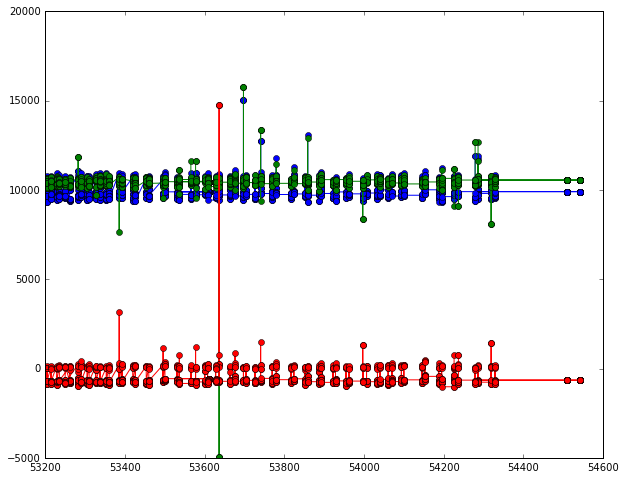

In [4]:
plt.plot(data['Time[MJD]'], data['Raw_Flux'], 'o-', rasterized = True)
plt.plot(data['Time[MJD]'], data['Res_Flux'], 'o-', rasterized = True)
plt.plot(data['Time[MJD]'], data['Bkg_Flux'], 'o-', rasterized = True)

In [10]:
hd_data = ascii.read('hd_ch1_data.csv')
hd_data

File#,ACenX,ACenY,FCenX,FCenY,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux
str13,float64,float64,float64,float64,float64,float64,float64,float64
11638016_0000,130.204115142,126.80802829,130.205385657,126.525119496,53204.9589689,17280.79676,217.582731405,17063.2140286
11638016_0001,467.738847917,118.198197201,130.205385657,126.525119496,53204.9592097,17280.79676,217.582731405,17063.2140286
11638016_0002,67.7769860643,190.064908182,68.0432073057,189.838214351,53204.9594597,17718.4987023,206.468540936,17512.0301614
11638016_0003,401.592275999,182.442111262,68.0432073057,189.838214351,53204.9596819,17718.4987023,206.468540936,17512.0301614
11638016_0004,193.189569783,189.613813838,193.13645238,189.134013889,53204.9598902,17704.1132683,257.384416515,17446.7288518
11638016_0005,535.692164497,183.535475108,193.13645238,189.134013889,53204.9601125,17704.1132683,257.384416515,17446.7288518
11638016_0006,192.87679071,63.5899235305,193.026840568,63.1090896377,53204.9603579,17862.8007192,301.4909772,17561.309742
11638016_0007,536.361342463,53.2168954741,193.026840568,63.1090896377,53204.96058,17862.8007192,301.4909772,17561.309742
11638016_0008,66.785199777,63.9439145388,67.0511936806,63.4841993491,53204.9608393,17696.8168828,297.255299381,17399.5615834


In [11]:
bd_data = ascii.read('bd_ch1_data.csv')
bd_data

File#,ACenX,ACenY,FCenX,FCenY,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux
str13,float64,float64,float64,float64,float64,float64,float64,float64
11641856_0000,130.127231671,126.954124127,130.204996285,126.743548224,53204.9626309,1069.06381008,20.382972703,1048.68083738
11641856_0000,130.126604411,126.95375743,130.210546687,126.739876313,53204.9626541,1036.52498967,-8.43654856798,1044.96153824
11641856_0001,467.821380679,118.70908066,130.210546687,126.739876313,53204.962992,1036.52498967,-8.43654856798,1044.96153824
11641856_0001,467.901623142,118.739903258,130.210546687,126.739876313,53204.9630152,1036.52498967,-8.43654856798,1044.96153824
11641856_0002,67.5821841821,189.584247263,67.8758878213,189.20563554,53204.9633578,1052.0485346,12.4035950505,1039.64493955
11641856_0002,67.400804988,189.587760384,67.7570365874,189.246752074,53204.9633809,1018.33387787,-11.511892358,1029.84577023
11641856_0003,401.494674015,182.168459511,67.7570365874,189.246752074,53204.9636957,1018.33387787,-11.511892358,1029.84577023
11641856_0003,401.611948954,182.128148143,67.7570365874,189.246752074,53204.9637188,1018.33387787,-11.511892358,1029.84577023
11641856_0004,193.294811182,189.4110393,193.206486787,189.196411537,53204.9640197,1075.75310644,12.7802537429,1062.9728527


In [12]:
hd_crd = np.load('crd_conversion_issue_hd_ch1.npy')
bd_crd = np.load('crd_conversion_issue_bd_ch1.npy')
hd_cen = np.load('centroiding_issue_hd_ch1.npy')
bd_cen = np.load('centroiding_issue_bd_ch1.npy')

In [17]:
hd_problem_files = len(hd_cen) + len(hd_crd)
bd_problem_files = len(bd_cen) + len(bd_crd)
hd_problem_files, bd_problem_files

(2124, 2644)